<a href="https://colab.research.google.com/github/ShreyJais/ML-MSc_AIML/blob/main/2348558_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project aims to find deep insights into bank customer data and develop the best-performing churn prediction model.

#Importing and Loding the Dataset

In [55]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [56]:
data = pd.read_csv('/content/drive/MyDrive/ML/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#Data cleaning


In [57]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
data.duplicated().sum()

0

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [60]:
#removing un-related data
df = data.drop(data[["RowNumber", "CustomerId", "Surname"]], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [61]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [62]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

#Outliers

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [64]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

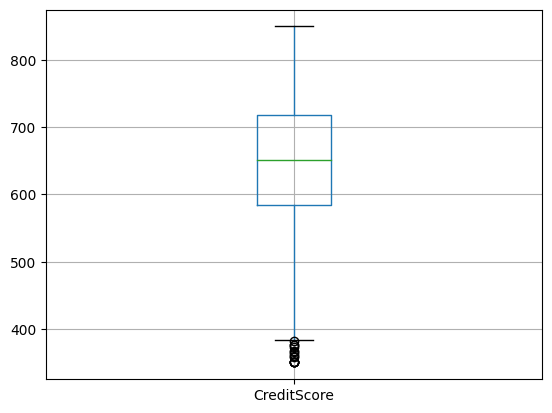

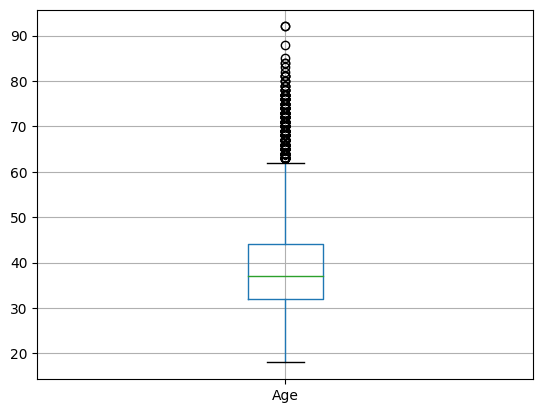

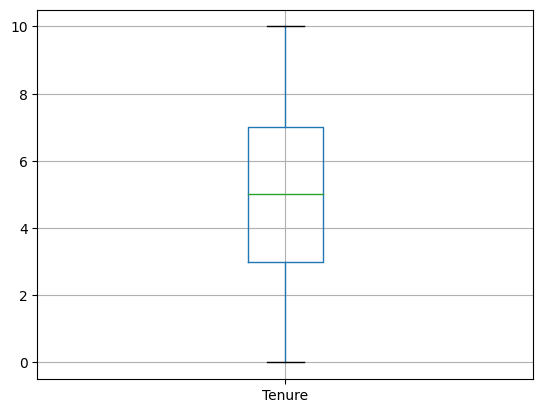

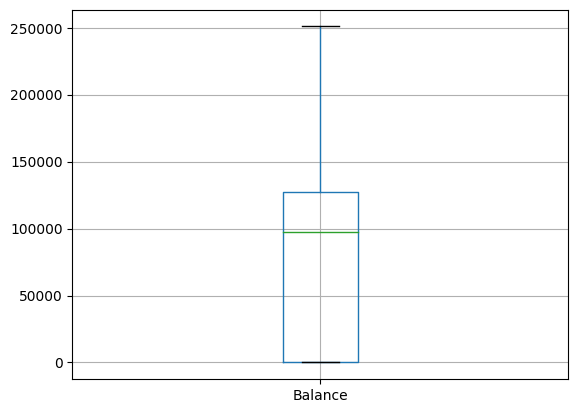

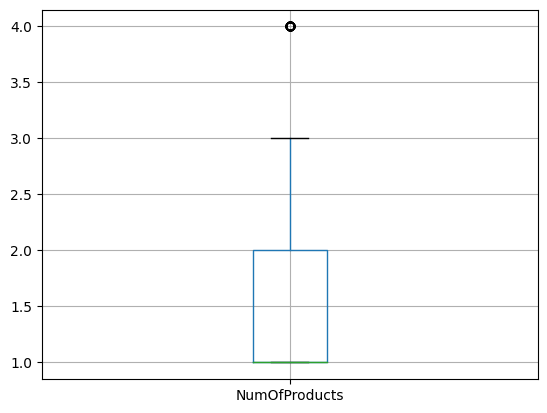

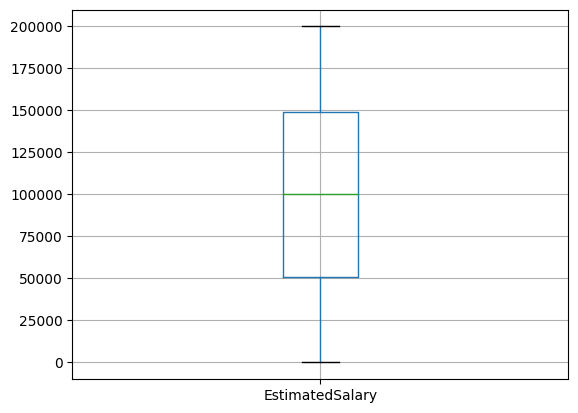

In [65]:
for col in ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]:
    plt.figure()
    df.boxplot([col])
#the columns - Credit Score, Age, Num Products have outliers.

<Figure size 640x480 with 0 Axes>

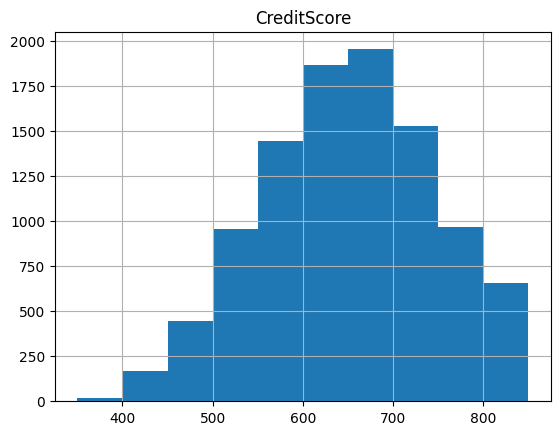

<Figure size 640x480 with 0 Axes>

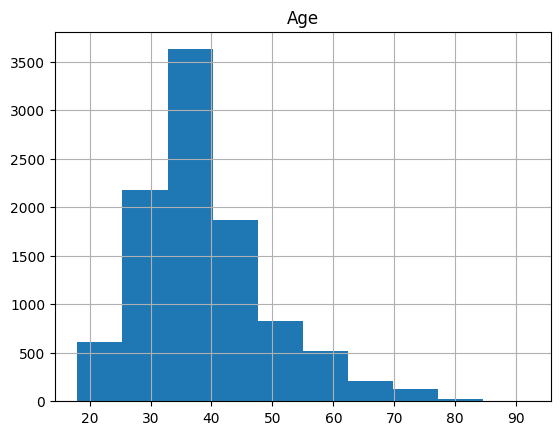

<Figure size 640x480 with 0 Axes>

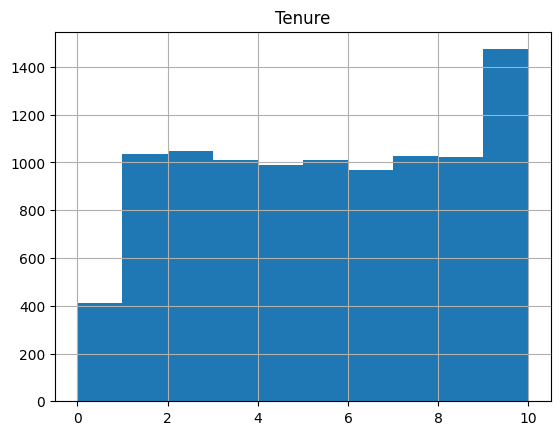

<Figure size 640x480 with 0 Axes>

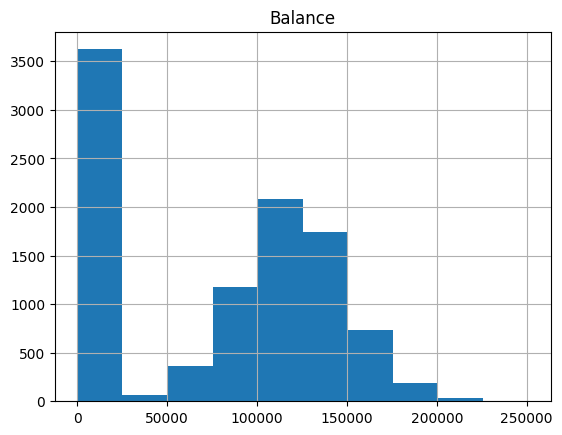

<Figure size 640x480 with 0 Axes>

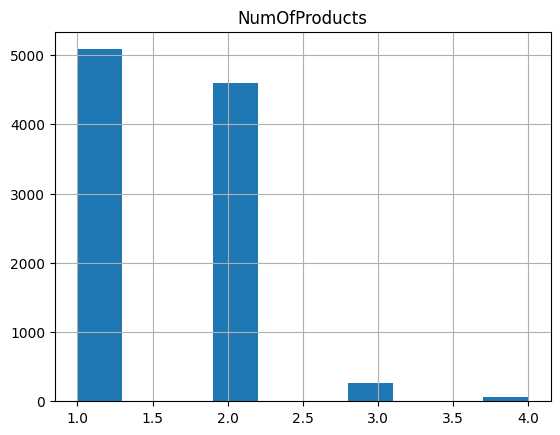

<Figure size 640x480 with 0 Axes>

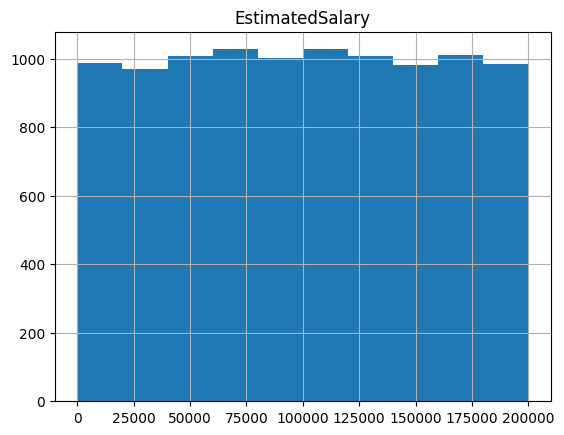

In [66]:
for col in ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]:
    plt.figure()
    df.hist([col])
#we can see the data is not normalized so we cant use z-score

#IQR

In [67]:
def IQR(data : pd.DataFrame, thershold =1.5):
  # Calculate the first quartile (Q1) and third quartile (Q3)
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  # Calculate the IQR (Interquartile Range)
  iqr = q3 - q1
  # Define lower and upper bounds for outlier detection
  lower_bound = q1 - thershold * iqr
  upper_bound = q3 + thershold * iqr
  data_without_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
  print("data removed:\t",data.shape[0]-data_without_outliers.shape[0])
  return data_without_outliers


In [68]:
numberic_feature = df[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "NumOfProducts"]]
numberic_feature
IQR_numberic_feature = IQR(numberic_feature)

data removed:	 0


#Z-score

In [69]:
import scipy.stats as ss
import numpy as np

zscore = ss.zscore(numberic_feature)
outliers = zscore[np.abs(zscore.values)>1.5]
outliers

,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts
2,-1.536794,0.293517,1.032908,1.333053,0.240687,2.527057
2,-1.536794,0.293517,1.032908,1.333053,0.240687,2.527057
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,-0.911583
6,1.774174,1.056346,0.687130,-1.225848,-1.565487,0.807737
6,1.774174,1.056346,0.687130,-1.225848,-1.565487,0.807737
...,...,...,...,...,...,...
9987,-0.460730,-0.850726,1.032908,1.663964,-1.707180,0.807737
9989,1.970763,-1.041433,-0.350204,-1.225848,1.379754,0.807737
9992,0.780884,-0.278604,-1.041760,-1.225848,1.653732,-0.911583
9994,1.546545,-0.946079,-1.041760,-1.225848,1.176945,0.807737


In [70]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


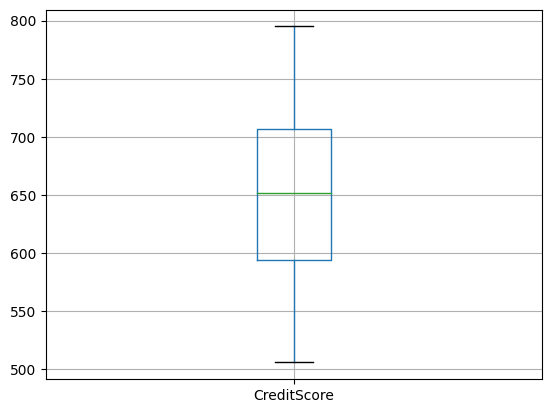

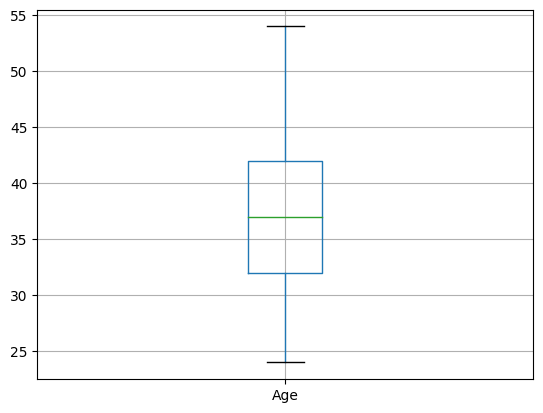

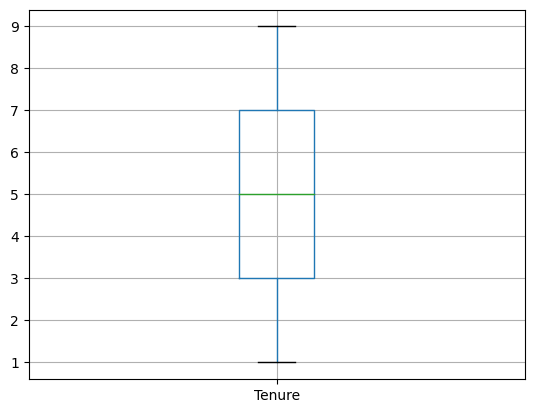

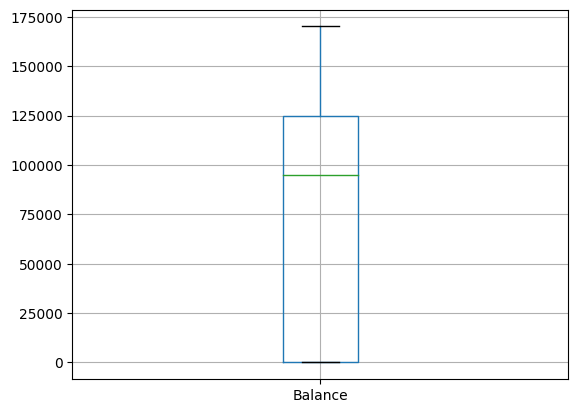

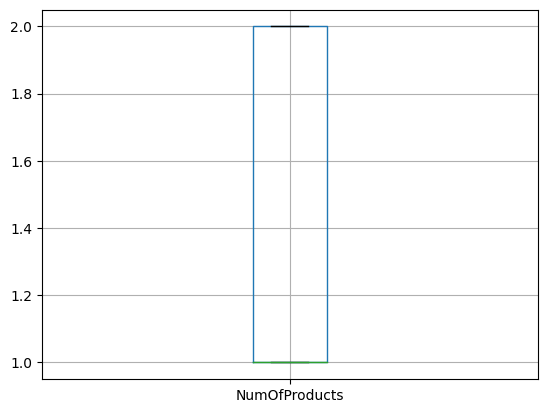

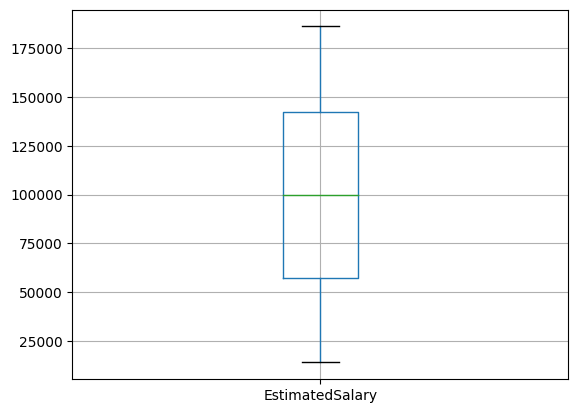

In [71]:
df = df.drop(outliers.index, axis=0)
for col in ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]:
    plt.figure()
    df.boxplot([col])
#outliers are been removed

#Encoding

In [72]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [73]:
from sklearn.preprocessing import LabelEncoder
for col in df[["Geography", "Gender"]]:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


#Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[["CreditScore", "Age", "Balance", "EstimatedSalary"]] = sc.fit_transform(df[["CreditScore", "Age", "Balance", "EstimatedSalary"]])

In [76]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.437510,0,0,0.693839,2,-1.207610,1,1,1,0.032442,1
1,-0.587745,2,0,0.551134,1,0.180326,1,0,1,0.259370,0
3,0.655109,0,0,0.265724,1,-1.207610,2,0,0,-0.120055,0
5,-0.082409,2,1,0.979248,8,0.676291,2,1,0,1.013805,1
9,0.450243,0,1,-1.446733,2,1.021555,1,1,1,-0.568102,0


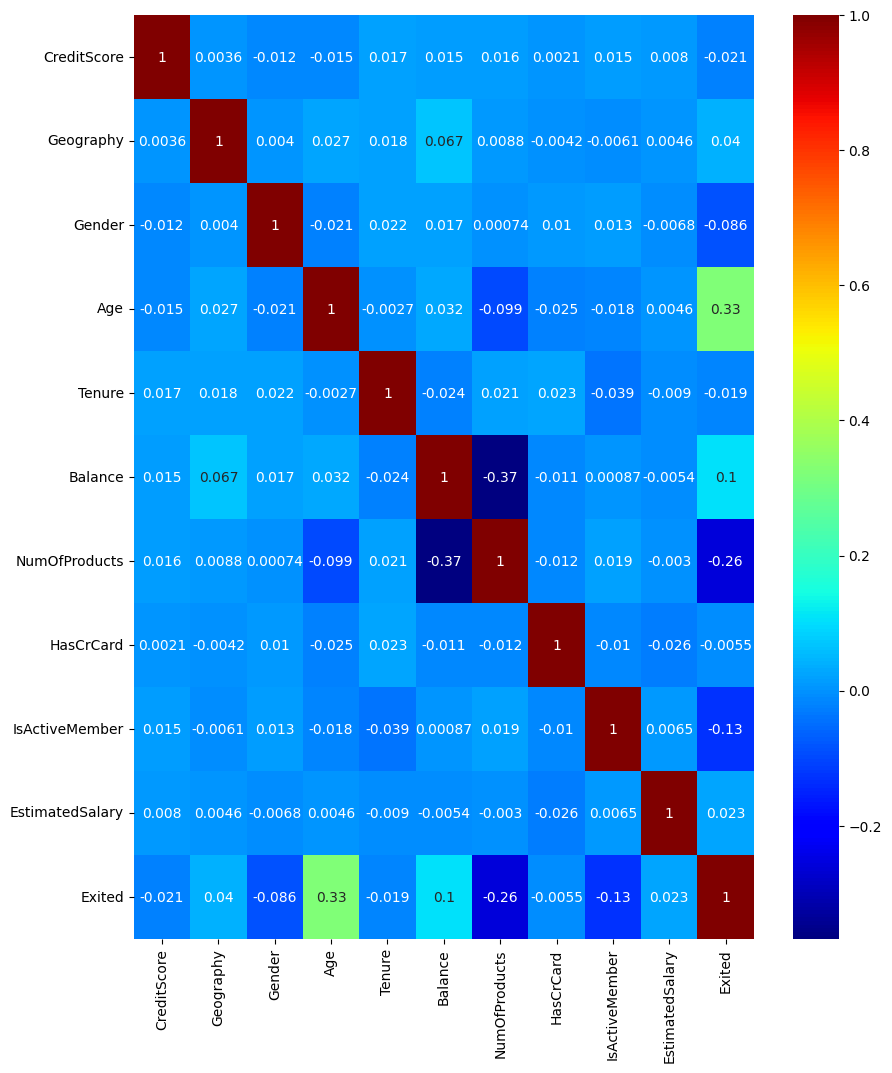

In [77]:

plt.figure(figsize=(10, 12))
sb.heatmap(df.corr(), annot=True, cmap='jet')
plt.show()

#DataV

In [78]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.437510,0,0,0.693839,2,-1.207610,1,1,1,0.032442,1
1,-0.587745,2,0,0.551134,1,0.180326,1,0,1,0.259370,0
3,0.655109,0,0,0.265724,1,-1.207610,2,0,0,-0.120055,0
5,-0.082409,2,1,0.979248,8,0.676291,2,1,0,1.013805,1
9,0.450243,0,1,-1.446733,2,1.021555,1,1,1,-0.568102,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.096067,0,1,-1.304028,7,1.360335,1,1,0,-1.430633,0
9995,1.638466,0,1,0.265724,5,-1.207610,2,1,0,-0.070508,0
9997,0.791686,0,0,-0.162390,7,-1.207610,1,0,1,-1.168991,1
9998,1.652124,1,1,0.693839,3,0.035707,2,1,0,-0.139073,1


In [79]:
df.Exited.value_counts()

0    4627
1     926
Name: Exited, dtype: int64

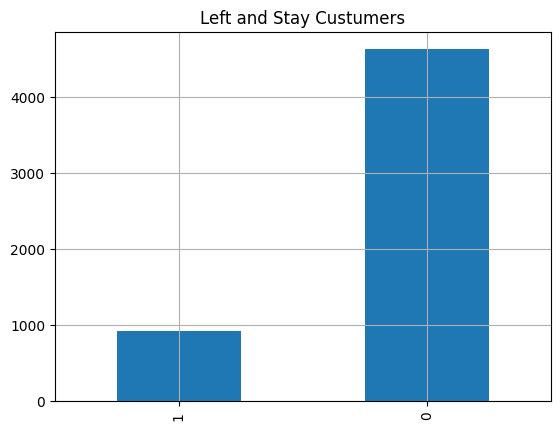

In [80]:
df.Exited.value_counts().sort_values().plot(kind='bar',title='Left and Stay Custumers',grid=True)
plt.show()
#here we can see an umbalance problem

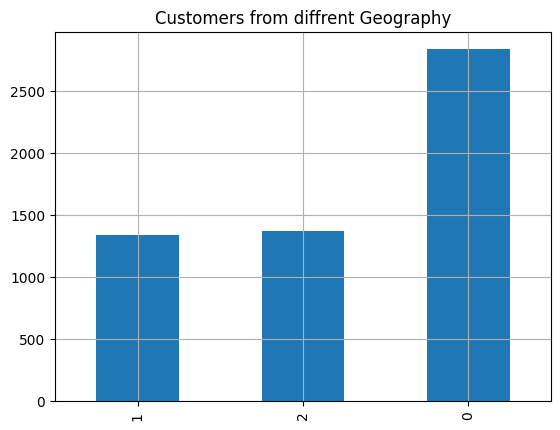

In [81]:
df.Geography.value_counts().sort_values().plot(kind='bar',title='Customers from diffrent Geography',grid=True)
plt.show()

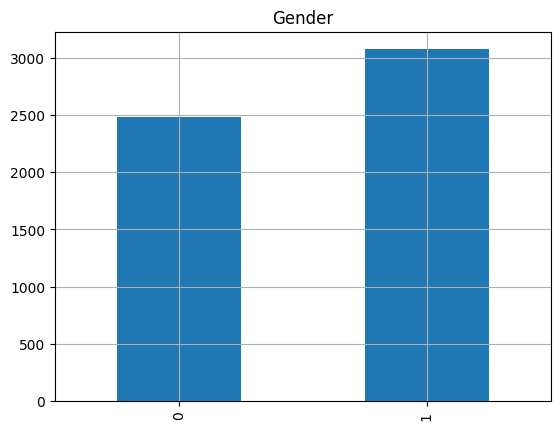

In [82]:
df.Gender.value_counts().sort_values().plot(kind='bar',title='Gender',grid=True)
plt.show()

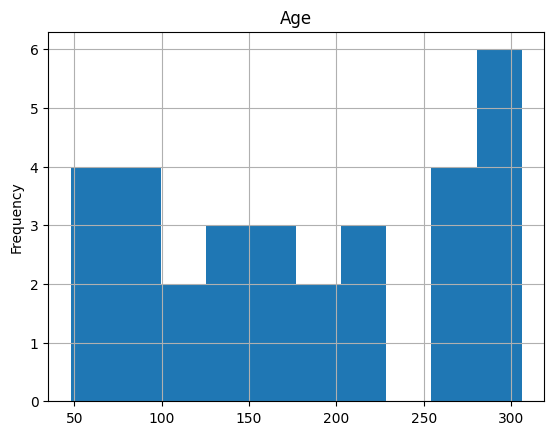

In [83]:
df.Age.value_counts().plot(kind='hist',title='Age',grid=True)
plt.show()

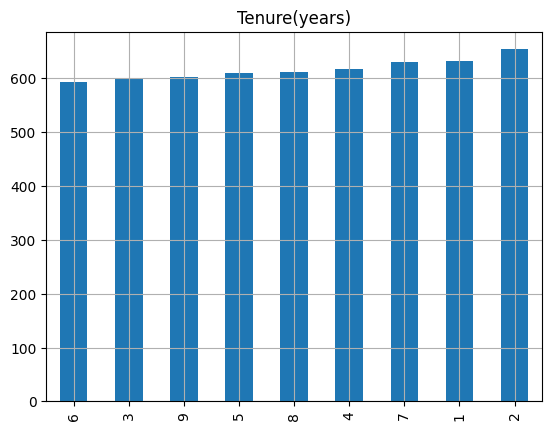

In [84]:
df.Tenure.value_counts().sort_values().plot(kind='bar',title='Tenure(years)',grid=True)
plt.show()

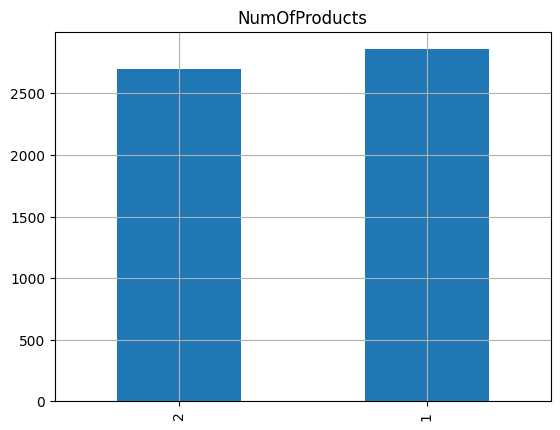

In [85]:
df.NumOfProducts.value_counts().sort_values().plot(kind='bar',title='NumOfProducts',grid=True)
plt.show()

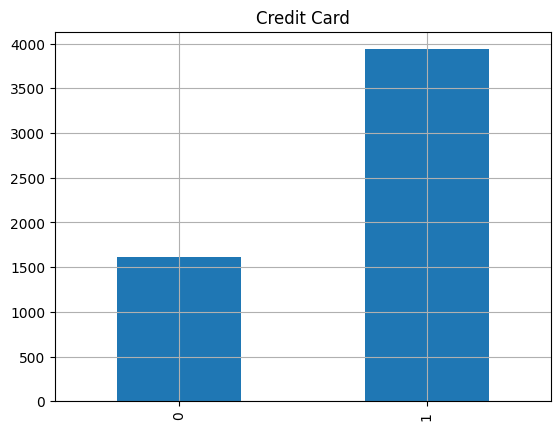

In [86]:
df.HasCrCard.value_counts().sort_values().plot(kind='bar',title='Credit Card',grid=True)
plt.show()

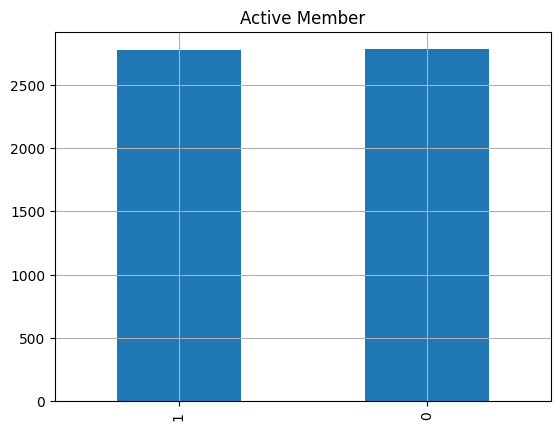

In [87]:
df.IsActiveMember.value_counts().sort_values().plot(kind='bar',title='Active Member',grid=True)
plt.show()

In [88]:
pd.crosstab(df['Exited'],df['Geography'])

Geography,0,1,2
Exited,,,
0,2483,951,1193
1,356,389,181


In [89]:
for col in ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]:
  display(pd.crosstab(df['Exited'],df[col]))

Geography,0,1,2
Exited,,,
0,2483,951,1193
1,356,389,181


Gender,0,1
Exited,,
0,1980,2647
1,502,424


NumOfProducts,1,2
Exited,,
0,2111,2516
1,746,180


HasCrCard,0,1
Exited,,
0,1343,3284
1,275,651


IsActiveMember,0,1
Exited,,
0,2180,2447
1,599,327


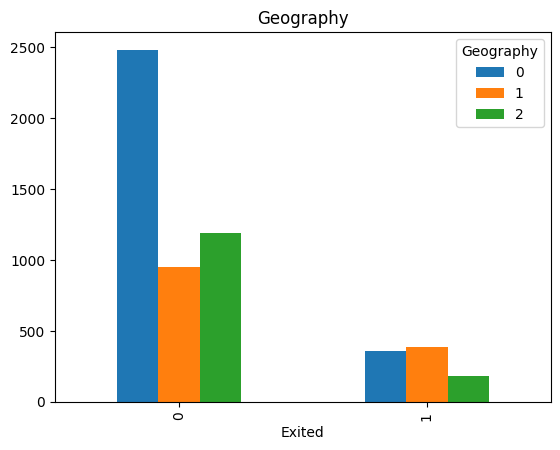

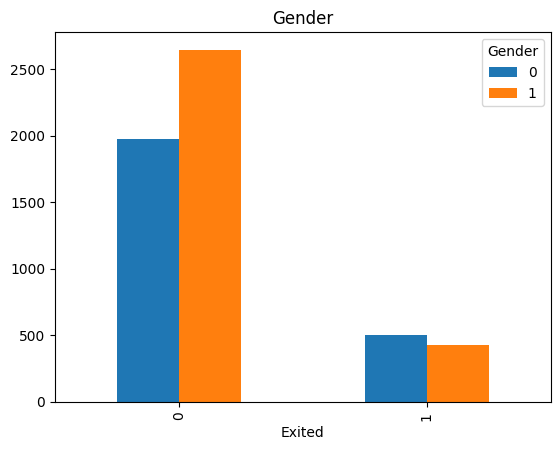

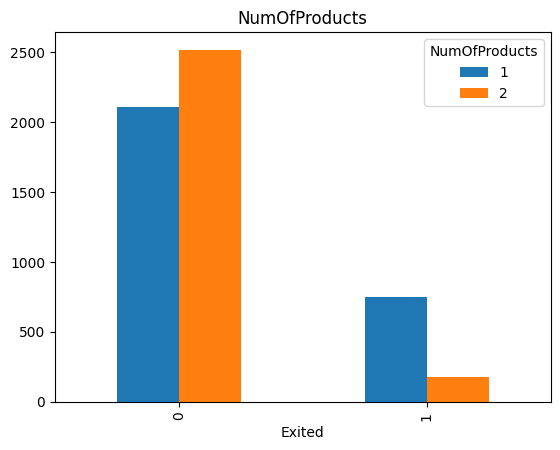

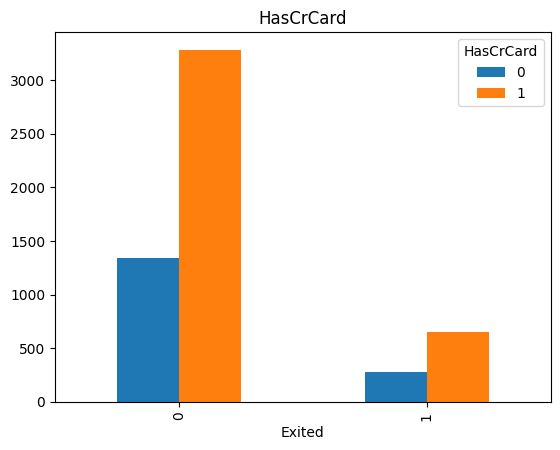

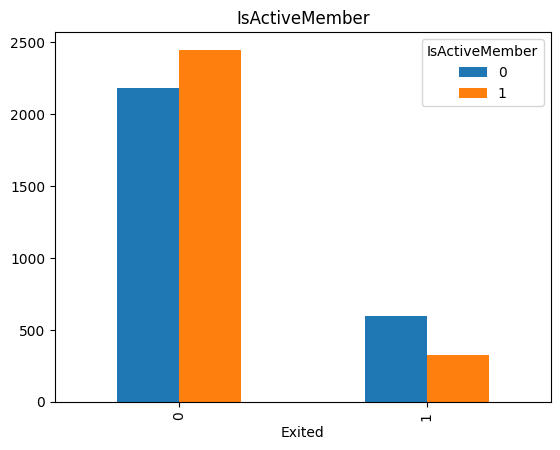

In [90]:
for col in ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]:
  pd.crosstab(df['Exited'],df[col]).plot(kind='bar')
  plt.title(col)
  plt.plot()

In [91]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.437510,0,0,0.693839,2,-1.207610,1,1,1,0.032442,1
1,-0.587745,2,0,0.551134,1,0.180326,1,0,1,0.259370,0
3,0.655109,0,0,0.265724,1,-1.207610,2,0,0,-0.120055,0
5,-0.082409,2,1,0.979248,8,0.676291,2,1,0,1.013805,1
9,0.450243,0,1,-1.446733,2,1.021555,1,1,1,-0.568102,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.096067,0,1,-1.304028,7,1.360335,1,1,0,-1.430633,0
9995,1.638466,0,1,0.265724,5,-1.207610,2,1,0,-0.070508,0
9997,0.791686,0,0,-0.162390,7,-1.207610,1,0,1,-1.168991,1
9998,1.652124,1,1,0.693839,3,0.035707,2,1,0,-0.139073,1


#Chi2



In [92]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.437510,0,0,0.693839,2,-1.207610,1,1,1,0.032442,1
1,-0.587745,2,0,0.551134,1,0.180326,1,0,1,0.259370,0
3,0.655109,0,0,0.265724,1,-1.207610,2,0,0,-0.120055,0
5,-0.082409,2,1,0.979248,8,0.676291,2,1,0,1.013805,1
9,0.450243,0,1,-1.446733,2,1.021555,1,1,1,-0.568102,0


In [93]:
#features selection
from sklearn.feature_selection import chi2

In [94]:
X = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]
y = df['Exited']  # Target variable
chi_vals = chi2(X, y)

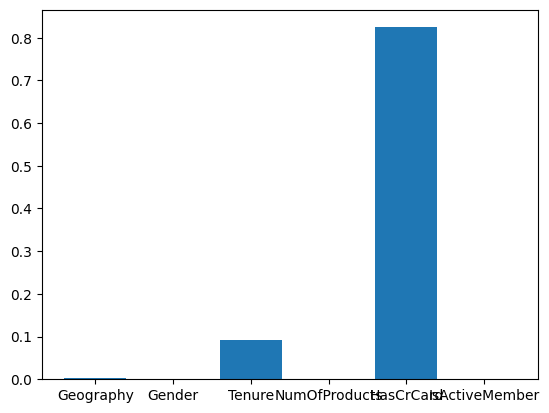

In [95]:
p_vals = pd.Series(chi_vals[1],index = X.columns)
plt.bar(X.columns, p_vals)
plt.show()

P value of HasCrCard is high so it is not important

#PCA

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # reducing to 2 components
np.ascontiguousarray(pca.fit_transform(X))
pca.components_

array([[ 0.00659605,  0.00440787,  0.99992049,  0.00417116,  0.00422398,
        -0.00780012],
       [ 0.99992256,  0.00326658, -0.00666604,  0.00787173, -0.00369464,
        -0.00491554]])

In [97]:
pca.explained_variance_ratio_
#very less verance is there so there is no need for dimension reduction

array([0.80356733, 0.08243383])

#Oversampling

In [98]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [99]:
X = df.drop('Exited', axis=1)
y = df.Exited
smt = SMOTE(random_state=9)

In [100]:
X.shape

(5553, 10)

In [101]:
y.shape

(5553,)

In [102]:
X_resampled, y_resampled = smt.fit_resample(X, y)

In [103]:
resampled_data = pd.DataFrame(data=X_resampled, columns=X.columns)
resampled_data['Exited'] = y_resampled
print(resampled_data['Exited'].value_counts())

1    4627
0    4627
Name: Exited, dtype: int64


In [104]:
resampled_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.437510,0,0,0.693839,2,-1.207610,1,1,1,0.032442,1
1,-0.587745,2,0,0.551134,1,0.180326,1,0,1,0.259370,0
2,0.655109,0,0,0.265724,1,-1.207610,2,0,0,-0.120055,0
3,-0.082409,2,1,0.979248,8,0.676291,2,1,0,1.013805,1
4,0.450243,0,1,-1.446733,2,1.021555,1,1,1,-0.568102,0


#Modeling